In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

from generadorRFM import setRFM

In [2]:
dataset=setRFM()

El numero de filas de este dataset es de:998


In [3]:
dataset.head()

,Id,Date,Frecuency,Money,R,F,M,ponderacion,Categoria
0,998,20130323,4,195.0,1.0,2.0,2.0,1.75,bronce
1,997,20130324,4,553.0,1.0,2.0,3.0,2.25,bronce
2,996,20130325,7,610.0,1.0,3.0,4.0,3.00,plata
3,995,20130326,4,538.0,1.0,2.0,3.0,2.25,bronce
4,994,20130327,8,47.0,1.0,4.0,1.0,1.75,bronce


# CONCLUSION

## Reporte de Recencia

In [4]:
d=dataset['R'].value_counts().to_dict()
r_frame=pd.DataFrame([d], columns=d.keys())
r_frame

,1.0,3.0,4.0,2.0,5.0
0,284,183,181,181,169


[]

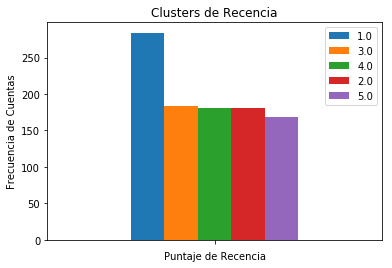

In [5]:
ax=r_frame.plot(kind='bar')
ax.set_title('Clusters de Recencia')
ax.set_xlabel('Puntaje de Recencia')
ax.set_ylabel('Frecuencia de Cuentas')
ax.set_xticklabels('')

## Reporte de Frecuencia

In [6]:
d=dataset['F'].value_counts().to_dict()
f_frame=pd.DataFrame([d], columns=d.keys())
f_frame

,3.0,5.0,1.0,2.0,4.0
0,288,215,201,186,108


[]

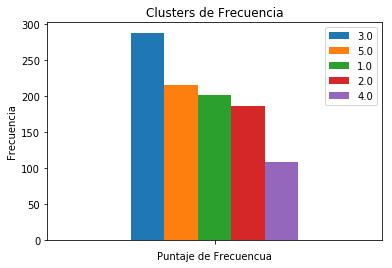

In [7]:
ax=f_frame.plot(kind='bar')
ax.set_title('Clusters de Frecuencia')
ax.set_xlabel('Puntaje de Frecuencua')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels('')

## Reporte de Monto

In [8]:
d=dataset['M'].value_counts().to_dict()
m_frame=pd.DataFrame([d], columns=d.keys())
m_frame

,5.0,3.0,4.0,2.0,1.0
0,212,203,200,199,184


[]

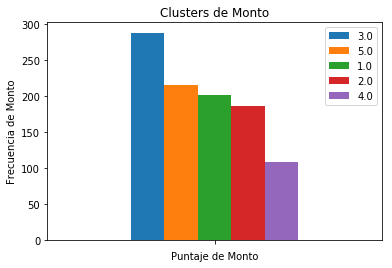

In [9]:
ax=f_frame.plot(kind='bar')
ax.set_title('Clusters de Monto')
ax.set_xlabel('Puntaje de Monto')
ax.set_ylabel('Frecuencia de Monto')
ax.set_xticklabels('')

## Reporte RFM

In [10]:
d=dataset['Categoria'].value_counts().to_dict()
c_frame=pd.DataFrame([d], columns=d.keys())
c_frame

,plata,oro,bronce
0,371,347,280


In [11]:
#dataset[(dataset['R']==1) & (dataset['F']==1) & (dataset['M']==1)]

[]

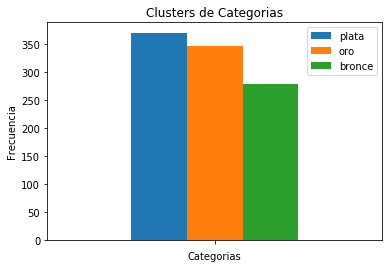

In [12]:
ax=c_frame.plot(kind='bar')
ax.set_title('Clusters de Categorias')
ax.set_xlabel('Categorias')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels('')

In [13]:
dataset

,Id,Date,Frecuency,Money,R,F,M,ponderacion,Categoria
0,998,20130323,4,195.0,1.0,2.0,2.0,1.75,bronce
1,997,20130324,4,553.0,1.0,2.0,3.0,2.25,bronce
2,996,20130325,7,610.0,1.0,3.0,4.0,3.00,plata
3,995,20130326,4,538.0,1.0,2.0,3.0,2.25,bronce
4,994,20130327,8,47.0,1.0,4.0,1.0,1.75,bronce
5,993,20130328,6,371.0,1.0,3.0,2.0,2.00,bronce
6,992,20130329,2,853.0,1.0,1.0,5.0,3.00,plata
7,991,20130330,7,931.0,1.0,3.0,5.0,3.50,oro
8,990,20130331,3,1.0,1.0,2.0,1.0,1.25,bronce
9,989,20130401,10,819.0,1.0,5.0,5.0,4.00,oro


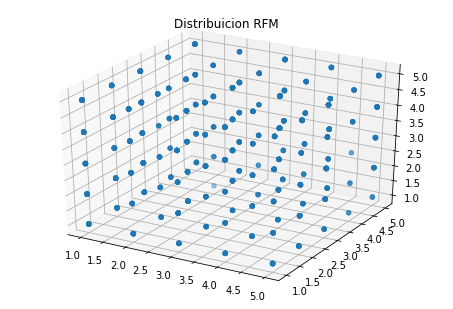

In [14]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(dataset['R'],dataset['F'],dataset['M'])
plt.title('Distribuicion RFM')
plt.show()